In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
pd.set_option("display.float", "{:.2f}".format)
pd.set_option("display.max_columns", None)
warnings.filterwarnings(action='ignore')

In [3]:
# 한글폰트적용
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 데이터로드

In [5]:
# Training data
train = pd.read_csv('application_train.csv')

In [6]:
print('Training data shape:{}'.format(train.shape))
train.head()

Training data shape:(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [7]:
# Test data
test = pd.read_csv('application_test.csv')

In [8]:
print('Test data shape:{}'.format(test.shape))
test.head()

Test data shape:(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.00,568800.00,20560.50,450000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.02,-19241,-2329,-5170.00,-812,NaN,1,1,0,1,0,1,NaN,2.00,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.75,0.79,0.16,0.07,0.06,0.97,NaN,NaN,NaN,0.14,0.12,NaN,NaN,NaN,0.05,NaN,NaN,0.07,0.06,0.97,NaN,NaN,NaN,0.14,0.12,NaN,NaN,NaN,0.05,NaN,NaN,0.07,0.06,0.97,NaN,NaN,NaN,0.14,0.12,NaN,NaN,NaN,0.05,NaN,NaN,NaN,block of flats,0.04,"Stone, brick",No,0.00,0.00,0.00,0.00,-1740.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
1,100005,Cash loans,M,N,Y,0,99000.00,222768.00,17370.00,180000.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.04,-18064,-4469,-9118.00,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.00,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.56,0.29,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00
2,100013,Cash loans,M,Y,Y,0,202500.00,663264.00,69777.00,630000.00,NaN,Working,Higher education,Married,House / apartment,0.02,-20038,-4458,-2175.00,-3503,5.00,1,1,0,1,0,0,Drivers,2.00,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.70,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-856.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,4.00
3,100028,Cash loans,F,N,Y,2,315000.00,1575000.00,49018.50,1575000.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.03

# EDA

### 변수명, 데이터 타입, 결측치 등 확인

In [9]:
pd.set_option('max_rows', None)
pd.DataFrame({
    'Data type':train.dtypes,
    'No. unique values':train.nunique(),
    '% of missing values':train.isna().sum()/len(train)
})

,Data type,No. unique values,% of missing values
SK_ID_CURR,int64,307511,0.00
TARGET,int64,2,0.00
NAME_CONTRACT_TYPE,object,2,0.00
CODE_GENDER,object,3,0.00
FLAG_OWN_CAR,object,2,0.00
FLAG_OWN_REALTY,object,2,0.00
CNT_CHILDREN,int64,15,0.00
AMT_INCOME_TOTAL,float64,2548,0.00
AMT_CREDIT,float64,5603,0.00
AMT_ANNUITY,float64,13672,0.00


In [10]:
train_id = train['SK_ID_CURR']
test_id = test['SK_ID_CURR']
target = ['TARGET']

# 범주형 변수
cat_cols = train.select_dtypes(include='object').columns.tolist()
tmp = train.select_dtypes(exclude='object')
cat_cols = cat_cols + tmp.nunique()[tmp.nunique() < 5].keys().tolist()
cat_cols.remove(target[0])

# 수치형 변수
num_cols = [col for col in train.columns if col not in ['SK_ID_CURR'] + target + cat_cols]

### 결측치를 가진 변수 확인

In [11]:
pd.set_option('max_rows', None)
missing_table = pd.DataFrame({
    'Missing values':train.isna().sum(),
    '% of missing values':train.isna().sum()/len(train)
})

missing_table[missing_table.iloc[:, 0] > 0].sort_values('Missing values', ascending=False)

,Missing values,% of missing values
COMMONAREA_MEDI,214865,0.70
COMMONAREA_AVG,214865,0.70
COMMONAREA_MODE,214865,0.70
NONLIVINGAPARTMENTS_MEDI,213514,0.69
NONLIVINGAPARTMENTS_MODE,213514,0.69
NONLIVINGAPARTMENTS_AVG,213514,0.69
FONDKAPREMONT_MODE,210295,0.68
LIVINGAPARTMENTS_MODE,210199,0.68
LIVINGAPARTMENTS_MEDI,210199,0.68
LIVINGAPARTMENTS_AVG,210199,0.68


### 타겟변수 분포

<AxesSubplot:xlabel='TARGET', ylabel='count'>

Text(0.5, 1.0, 'Distribution of TARGET')

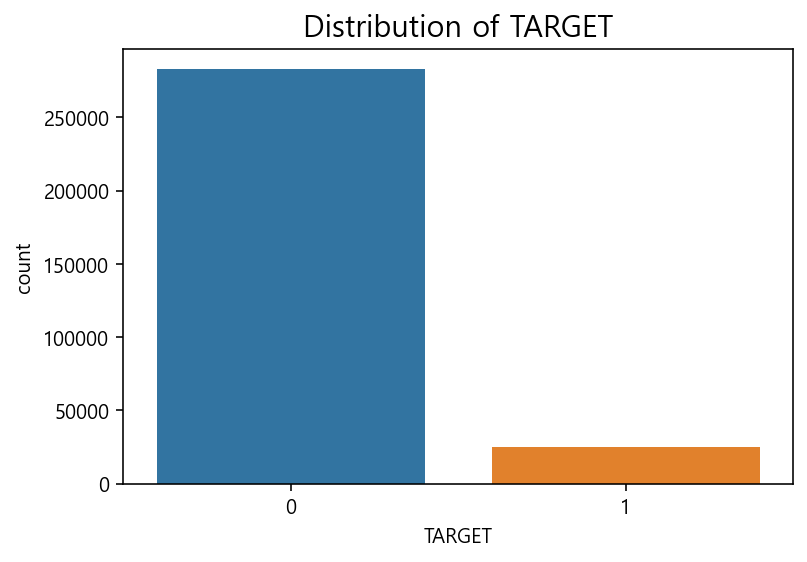

In [12]:
sns.countplot(x='TARGET', data=train)
plt.title('Distribution of TARGET', fontdict={'fontsize':15})

In [13]:
train['TARGET'].value_counts(normalize=True)

0   0.92
1   0.08
Name: TARGET, dtype: float64

### 기초통계량

In [14]:
train[num_cols].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307509.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,2.15,12.06,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.01,0.01,0.03,0.27,0.27,1.90
std,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.91,3.27,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.08,0.11,0.20,0.92,0.79,1.87
min,0.00,25650.00,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,-24672.00,-7197.00,0.00,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4292.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,112500.00,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,-7479.50,-4299.00,5.00,2.00,10.00,0.33,0.39,0.37,0.06,0.04,0.98,0.69,0.01,0.00,0.07,0.17,0.08,0.02,0.05,0.05,0.00,0.00,0.05,0.04,0.98,0.70,0.01,0.00,0.07,0.17,0.08,0.02,0.05,0.04,0.00,0.00,0.06,0.04,0.98,0.69,0.01,0.00,0.07,0.17,0.08,0.02,0.05,0.05,0.00,0.00,0.04,0.00,0.00,0.00,0.00,-1570.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,147150.00,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,-4504.00,-3254.00,9.00,2.00,12.00,0.51,0.57,0.54,0.09,0.08,0.98,0.76,0.02,0.00,0.14,0.17,0.21,0.05,0.08,0.07,0.00,0.00,0.08,0.07,0.98,0.76,0.02,0.00,0.14,0.17,0.21,0.05,0.08,0.07,0.00,0.00,0.09,0.08,0.98,0.76,0.02,0.00,0.14,0.17,0.21,0.05,0.08,0.07,0.00,0.00,0.07,0.00,0.00,0.00,0.00,-757.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,1.00,202500.00,808650.00,34596.00,679500.00,0.03,

### 수치형 변수 분포

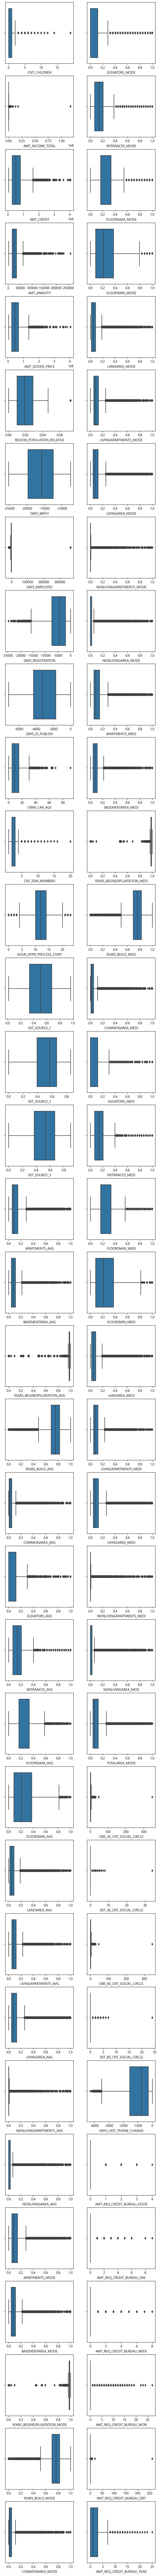

In [15]:
fig, axes = plt.subplots(35, 2, figsize=(8, 4*35))
for ind, col in enumerate(num_cols):
    _ = sns.boxplot(x=col, data=train, ax=axes[np.where(ind<35, ind, ind-35), np.where(ind<35, 0, 1)])

### Anomalies

##### AMT_INCOME_TOTAL

In [16]:
len(train[train['AMT_INCOME_TOTAL'] > 0.5e+8])

1

In [17]:
train[train['AMT_INCOME_TOTAL'] > 0.5e+8]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.00,562491.00,26194.50,454500.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.01,-12615,-922,-6762.00,-3643,NaN,1,1,0,1,0,0,Laborers,3.00,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.46,0.11,0.15,0.10,0.09,0.98,NaN,NaN,0.00,0.21,0.17,NaN,0.07,NaN,0.06,NaN,NaN,0.10,0.10,0.98,NaN,NaN,0.00,0.21,0.17,NaN,0.07,NaN,0.06,NaN,NaN,0.10,0.09,0.98,NaN,NaN,0.00,0.21,0.17,NaN,0.07,NaN,0.06,NaN,NaN,NaN,block of flats,0.07,"Stone, brick",No,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00


In [18]:
anomaly1 = train['AMT_INCOME_TOTAL'] > 0.5e+8

##### DAYS_EMPLOYED

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

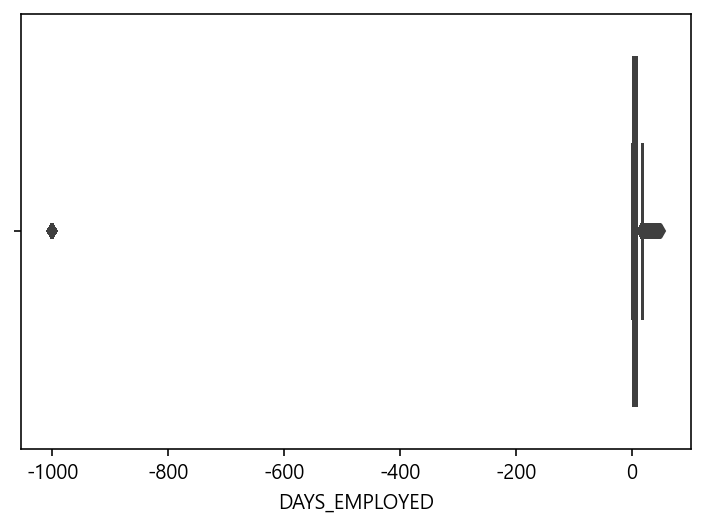

In [19]:
YEARS_EMPLOYED = train['DAYS_EMPLOYED']/-365
sns.boxplot(YEARS_EMPLOYED)

In [20]:
anomaly2 = YEARS_EMPLOYED <0
sum(anomaly2)

55374

In [21]:
pd.set_option('max_rows', 10)
train[anomaly2][['DAYS_EMPLOYED']]

,DAYS_EMPLOYED
8,365243
11,365243
23,365243
38,365243
43,365243
...,...
307469,365243
307483,365243
307487,365243
307505,365243


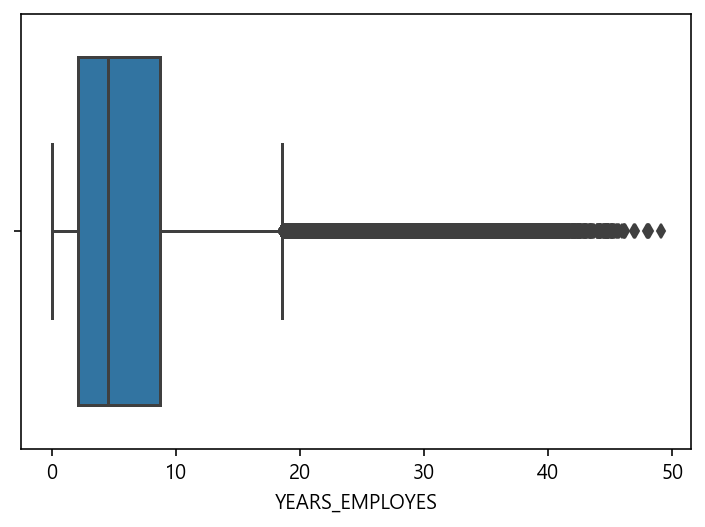

In [22]:
tmp = train[~anomaly2]
tmp['YEARS_EMPLOYES'] = tmp['DAYS_EMPLOYED']/-365
_ = sns.boxplot(data=tmp, x='YEARS_EMPLOYES')

### 상관관계

In [23]:
corr = train[ ['TARGET'] + num_cols].corr()
pd.set_option('max_rows', None)
corr

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.00,0.02,-0.00,-0.03,-0.01,-0.04,-0.04,0.08,-0.04,0.04,0.05,0.04,0.01,-0.02,-0.16,-0.16,-0.18,-0.03,-0.02,-0.01,-0.02,-0.02,-0.03,-0.02,-0.04,-0.03,-0.01,-0.03,-0.03,-0.00,-0.01,-0.03,-0.02,-0.01,-0.02,-0.02,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.03,-0.00,-0.01,-0.03,-0.02,-0.01,-0.02,-0.02,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.03,-0.00,-0.01,-0.03,0.01,0.03,0.01,0.03,0.06,0.00,0.00,0.00,-0.01,-0.00,0.02
CNT_CHILDREN,0.02,1.00,0.01,0.00,0.02,-0.00,-0.03,0.33,-0.24,0.18,-0.03,0.01,0.88,-0.01,-0.14,-0.02,-0.04,-0.01,-0.01,0.01,0.03,0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,0.01,0.03,0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,0.01,0.03,0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,0.00,-0.01,0.02,-0.00,0.02,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.04
AMT_INCOME_TOTAL,-0.00,0.01,1.00,0.16,0.19,0.16,0.07,0.03,-0.06,0.03,0.01,-0.12,0.02,0.04,0.03,0.06,-0.03,0.03,0.02,0.01,0.04,0.09,0.05,0.01,0.06,0.14,-0.00,0.11,0.04,0.03,0.07,0.03,0.01,0.01,0.04,0.08,0.04,0.00,0.06,0.13,-0.00,0.09,0.03,0.03,0.06,0.03,0.02,0.01,0.04,0.09,0.04,0.00,0.06,0.14,-0.00,0.10,0.04,0.03,0.07,0.04,-0.01,-0.01,-0.01,-0.01,-0.02,0.00,0.00,0.00,0.02,0.00,0.01
AMT_CREDIT,-0.03,0.00,0.16,1.00,0.77,0.99,0.10,-0.06,-0.07,0.01,-0.01,-0.09,0.06,0.05,0.17,0.13,0.04,0.06,0.04,0.01,0.04,0.05,0.08,0.01,0.10,0.08,0.01,0.06,0.07,0.01,0.04,0.05,0.03,0.00,0.03,0.04,0.07,0.01,0.10,0.08,0.00,0.05,0.06,0.01,0.03,0.06,0.04,0.01,0.04,0.05,0.08,0.01,0.10,0.08,0.01,0.06,0.07,0.01,0.04,0.07,0.00,-0.02,0.00,-0.02,-0.07,-0.00,0.00,-0.00,0.05,0.02,-0.05
AMT_ANNUITY,-0.01,0.02,0.19,0.77,1.00,0.78,0.12,0.01,-0.10,0.04,0.01,-0.10,0.08,0.05,0.12,0.13,0.03,0.08,0.04,0.01,0.03,0.06,0.10,0.01,0.13,0.10,0.01,0.08,0.09,0.02,0.05,0.07,0.03,0.01,0.03,0.05,0.09,0.01,0.13,0.09,0.00,0.07,0.08,0.02,0.04,0.07,0.04,0.01,0.03,0.06,0.10,0.01,0.13,0.10,0.01,0.07,0.09,0.02,0.05,0.09,-0.01,-0.02,-0.01,-0.02,-0.06,0.00,0.00,0.01,0.04,0.01,-0.01
AMT_GOODS_PRICE,-0.04,-0.00,0.16,0.99,0.78,1.00,0.10,-0.05,-0.06,0.01,-0.01,-0.10,0.06,0.06,0.18,0.14,0.05,0.06,0.04,0.01,0.04,0.05,0.08,0.02,0.11,0.08,0.01,0.06,0.08,0.02,0.04,0.06,0.04,0.01,0.04,0.04,0.08,0.01,0.11,0.08,0.01,0.05,0.07,0.01,0.04,0.06,0.04,0.01,0.04,0.05,0.08,0.02,0.11,0.08,0.01,0.06,0.08,0.01,0.04,0.08,0.00,-0.02,0.00,-0.02,-0.08,-0.00,0.00,-0.00,0.06,0.02,-0.05
REGION_POPULATION_RELATIVE,-0.04,-0.03,0.07,0.10,0.12,0.10,1.00,-0.03,-0.00,-0.05,-0.00,-0.08,-0.02,0.17,0.10,0.20,-0.01,0.21,0.10,-0.01,-0.06,0.16,0.28,0.04,0.32,0.29,-0.05,0.19,0.21,0.02,0.07,0.18,0.07,-0.01,-0.06,0.13,0.25,0.02,0.30,0.28,-0.06,0.16,0.18,0.02,0.05,0.20,0.09,-0.01,-0.06,0.16,0.27,0.03,0.32,0.29,-0.05,0.19,0.21,0.02,0.07,0.20,-0.01,0.01,-

In [24]:
# 다중공선성으로 인해 오버피팅을 일으킬 수 있는 변수들
multicollinearity_cols = train.loc[:, train.columns.str.endswith(('_AVG', '_MODE'))].columns.tolist() + ['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT', 'CNT_FAM_MEMBERS']

num_cols = [col for col in num_cols if col not in multicollinearity_cols]

### 범주형 변수 분포

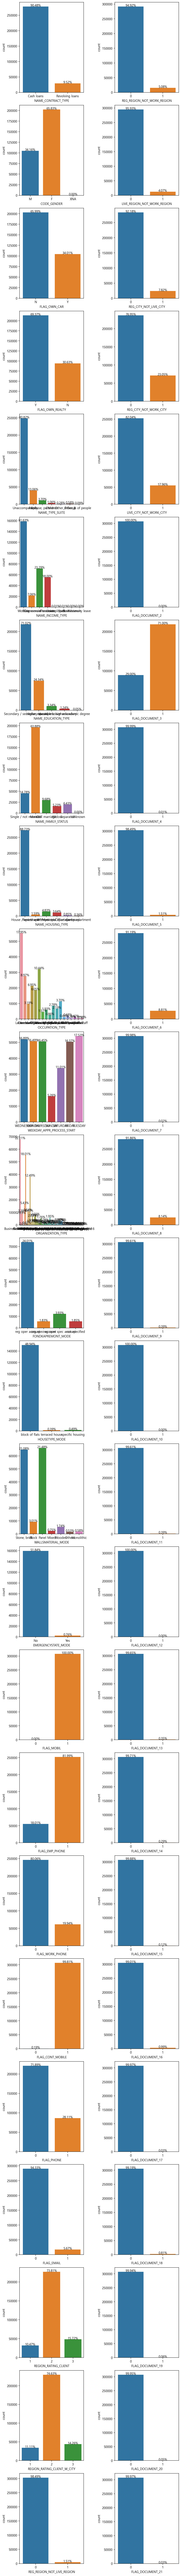

In [25]:
fig, axes = plt.subplots(25, 2, figsize=(8, 4.5*25))
for ind, col in enumerate(cat_cols):
    _ = sns.countplot(x=col, data=train, ax = axes[np.where(ind<25, ind, ind-25), np.where(ind<25, 0, 1)])
    
    for p in axes[np.where(ind<25, ind, ind-25), np.where(ind<25, 0, 1)].patches:
        total = len(train[col])
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        _ = axes[np.where(ind<25, ind, ind-25), np.where(ind<25, 0, 1)].annotate(percentage, (x, y),ha='center')    
        
fig.tight_layout()

In [26]:
# Variance가 아주 낮은 범주형 변수
train['CODE_GENDER'].value_counts()
train['FLAG_MOBIL'].value_counts()
train['FLAG_DOCUMENT_2'].value_counts()
train['FLAG_DOCUMENT_10'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64

0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64

In [27]:
# CODE_GENDER 칼럼에서 Category가 XNA인 개체 삭제
train = train[train['CODE_GENDER'] != 'XNA']
test = test[test['CODE_GENDER'] != 'XNA']

In [28]:
# Variance가 낮은 범주형 변수들
too_little_variance = ['FLAG_MOBIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_10']
cat_cols = [col for col in cat_cols if col not in too_little_variance]

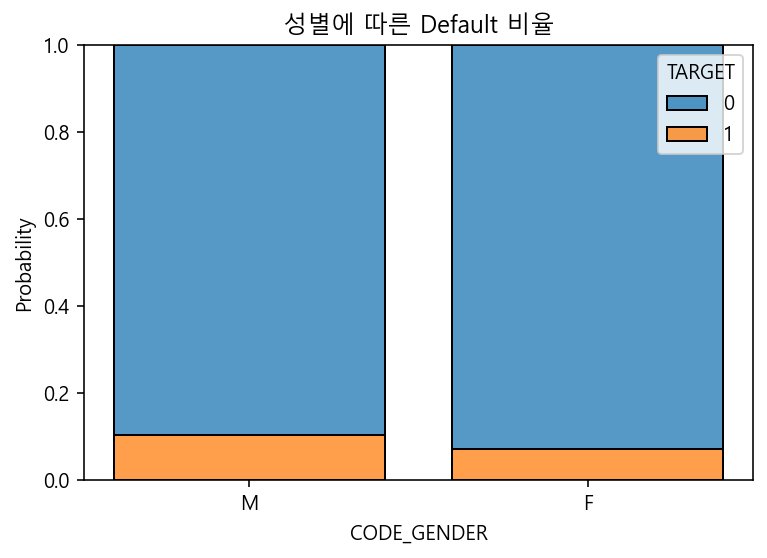

In [29]:
_ = sns.histplot(x='CODE_GENDER', hue='TARGET', data=train, stat='probability', multiple='fill', shrink=0.8)
_ = plt.title('성별에 따른 Default 비율')

# Data preparation

### 변수 제거

In [30]:
# 다중공선성 의심 변수와 분산이 낮은 변수 제거
train = train[target + cat_cols + num_cols]
test = test[cat_cols + num_cols]

### Anomalies 전처리

In [31]:
train['AMT_INCOME_TOTAL'].loc[train[anomaly1].index] = np.nan
train['DAYS_EMPLOYED'].loc[train[anomaly2].index] = np.nan

### 범주형 변수 인코딩

#### Ordinal encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in cat_cols:
    if train[col].nunique() <= 2:
        le.fit(train[col])
        
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])
        
        le_count += 1
        
print(f"{le_count} columns were label encoded")

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

34 columns were label encoded


#### Dummy encoding

In [33]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

print('Shape of encoded train set: {}'.format(train.shape))
print('Shape of encoded test set: {}'.format(test.shape))

Shape of encoded train set: (307507, 192)
Shape of encoded test set: (48744, 189)


In [34]:
# Aligning traing set with test set
train_labels = train['TARGET']

train, test = train.align(test, join='inner', axis=1)
train['TARGET'] = train_labels

print('Shape of aligned train set: {}'.format(train.shape))
print('Shape of aligned test set: {}'.format(test.shape))

Shape of aligned train set: (307507, 190)
Shape of aligned test set: (48744, 189)


### 결측치 대치

In [35]:
train_X = train.drop('TARGET', axis=1)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')
imputer.fit(train_X)

train_X_imp = imputer.transform(train_X)
test_imp = imputer.transform(test)

SimpleImputer()

### 정규화

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X_imp)

train_X_std = scaler.transform(train_X_imp)
test_std = scaler.transform(test_imp)

StandardScaler()

### 차원 축소

#### 변수 중요도 확인

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_importance = RandomForestClassifier(random_state=802)
rf_importance.fit(train_X_std, train[target[0]])

RandomForestClassifier(random_state=802)

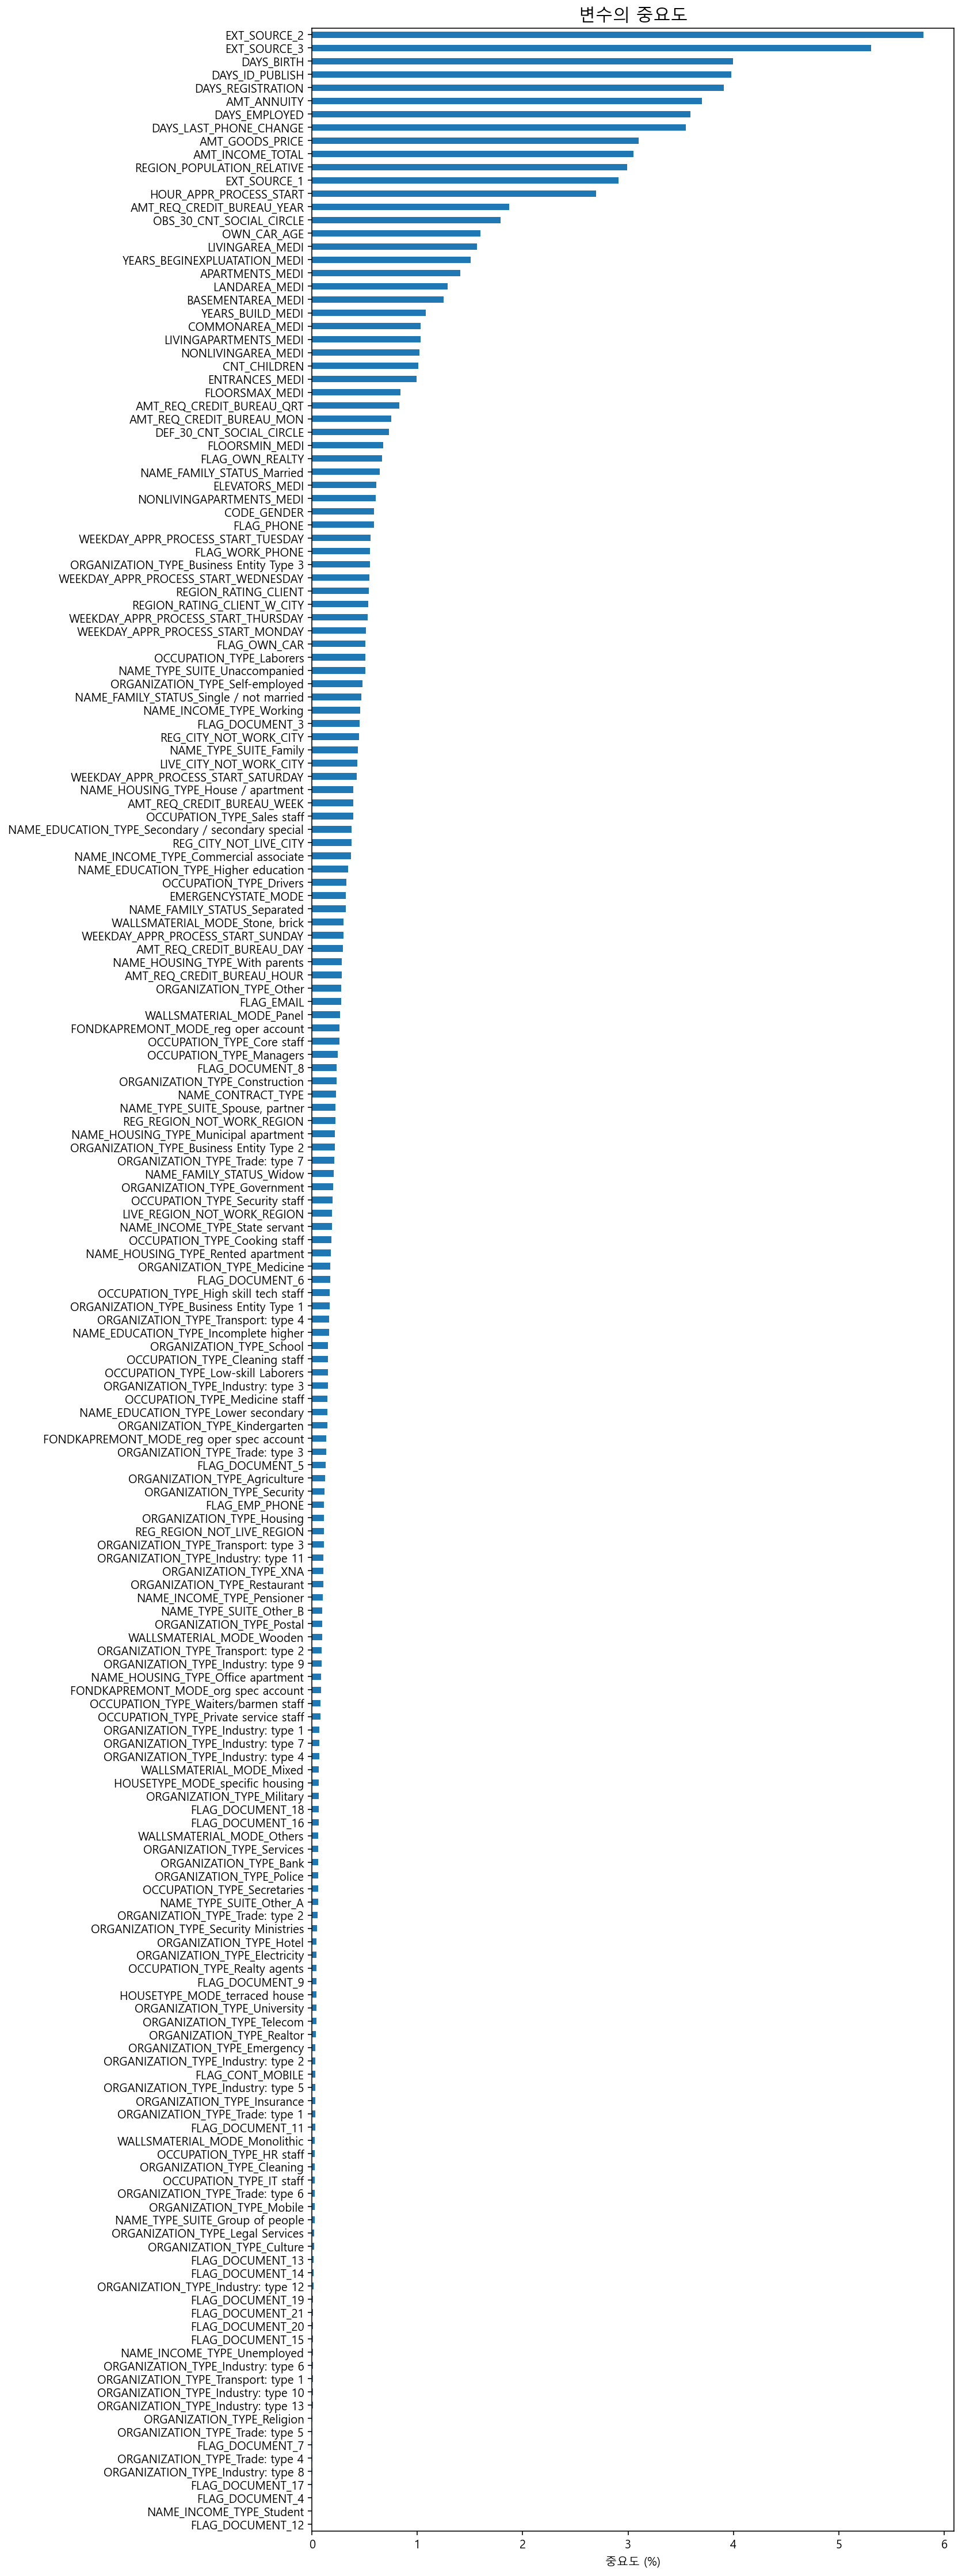

In [38]:
importance_rf = pd.Series(rf_importance.feature_importances_*100, index=train_X.columns).sort_values()

_ = plt.figure(figsize = (10, 40))
_ = importance_rf.plot(kind='barh')
_ = plt.title("변수의 중요도", fontdict={'fontsize':15})
_ = plt.xlabel('중요도 (%)')

#### PCA

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(train_X_std)

train_X_pca = pca.transform(train_X_std)
test_pca = pca.transform(test_std)

PCA(n_components=0.95)

In [40]:
print('Number of columns of train_X set before and after PCA transformation: {} -> {}'.format(train_X.shape[1], train_X_pca.shape[1]))

Number of columns of train_X set before and after PCA transformation: 189 -> 154


# 모델링

In [41]:
from sklearn.model_selection import train_test_split

fit_X, valid_X, fit_y, valid_y = train_test_split(train_X_pca, train['TARGET'], test_size=.3, stratify=train['TARGET'])

In [42]:
valid_X

array([[-0.0089954 , -0.25876299,  0.23617255, ..., -1.11695481,
         0.16886771, -0.09368141],
       [-1.88286601, -2.6774154 ,  1.80198638, ..., -0.07410803,
        -0.11146049,  2.06514399],
       [-0.44880422, -1.07228614, -1.20019273, ...,  0.38729734,
         1.05113106,  0.17954079],
       ...,
       [-0.92903806, -0.64828262, -2.62345712, ..., -0.37012789,
        -0.17400429,  0.26698287],
       [ 0.41290583, -1.34355358, -1.54495027, ...,  1.44205156,
        -0.37640901,  0.5791879 ],
       [ 1.41463671,  0.66331276,  1.45675154, ..., -1.30178941,
         0.39061232,  0.46151857]])

In [43]:
import xgboost as xgb

xgb_mod = xgb.XGBClassifier(learning_rate=0.1,
                           subsample=0.8,
                           colsample_bytree=0.8,
                           random_state=802,
                           verbosity=0,
                           n_jobs=-1)

xgb_mod.fit(fit_X, fit_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              random_state=802, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [44]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, roc_auc_score

def print_score(actual, pred, prob, split):
    print(f"\n{split} set modeling Result:")
    print("================================================")
    print(confusion_matrix(actual, pred))
    print(f"\nAccuracy Score: {round(accuracy_score(actual, pred), 5)*100}%")
    
    print(f"AUC Score: {round(roc_auc_score(actual, prob), 5)}")
    print("-----------------------------------------------")
    print(classification_report(actual, pred))
    print("-----------------------------------------------")

In [45]:
print_score(fit_y, xgb_mod.predict(fit_X), xgb_mod.predict_proba(fit_X)[:, 1], 'Train')


Train set modeling Result:
[[197836     41]
 [ 17137    240]]

Accuracy Score: 92.02%
AUC Score: 0.82725
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    197877
           1       0.85      0.01      0.03     17377

    accuracy                           0.92    215254
   macro avg       0.89      0.51      0.49    215254
weighted avg       0.91      0.92      0.88    215254

-----------------------------------------------


In [46]:
print_score(valid_y, xgb_mod.predict(valid_X), xgb_mod.predict_proba(valid_X)[:,1], "Test")


Test set modeling Result:
[[84766    39]
 [ 7404    44]]

Accuracy Score: 91.932%
AUC Score: 0.73146
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84805
           1       0.53      0.01      0.01      7448

    accuracy                           0.92     92253
   macro avg       0.72      0.50      0.48     92253
weighted avg       0.89      0.92      0.88     92253

-----------------------------------------------


In [47]:
# 테스트세트에 포함된 고객들의 디폴트 확률
pd.DataFrame({
    'Customer ID':test_id,
    'Default chance':xgb_mod.predict_proba(test_pca)[:,1]
}).head(100)

,Customer ID,Default chance
0,100001,0.05
1,100005,0.16
2,100013,0.03
3,100028,0.05
4,100038,0.10
5,100042,0.03
6,100057,0.02
7,100065,0.06
8,100066,0.03
9,100067,0.06


In [48]:
xgb_mod.predict_proba(test_pca)[:,1].mean()

0.19379175

In [50]:
xgb_mod.predict_proba(valid_X)[:,1].mean()

0.08028172